In [2]:
# %%file requirements.txt
import pandas as pd 
import numpy as np
#IMPORT THE LIBRARIES....
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data....
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

!pip install lightgbm
import lightgbm as lgb

from sklearn.dummy import DummyClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    # confusion_matrix,
    roc_auc_score,
    RocCurveDisplay,
    # plot_roc_curve,
)

# To be used for data scaling and encoding
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    RobustScaler,
)
from sklearn.impute import SimpleImputer

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin


# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# set the background for the graphs
plt.style.use("ggplot")

# For pandas profiling
# from pandas_profiling import ProfileReport

# Printing style
!pip install tabulate
from tabulate import tabulate

# To supress warnings
import warnings

# date time
from datetime import datetime




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:

path = '/content/drive/MyDrive/Colab Notebooks/MLOps_Thy/mlops_hackathon_2023/mlops_hackathon_phase_01/prob-1/raw_train.parquet'
import pyarrow.parquet as pq

df = pq.read_table(source=path).to_pandas()
# tf.to_csv("pro_1.csv")

# The static variables

# For dropping columns
columns_to_drop = [
    "feature1",
    "feature2",
]

# Random state and loss
seed = 1
loss_func = "logloss"

# Test and Validation sizes
test_size = 0.2
val_size = 0.25

# Dependent Varibale Value map
# target_mapper = {"fraud": 1, "not_fraud": 0}


# Splitting the dataset into dependent and independent variable sets
# X,y = data.drop(columns=["label"]),  data["label"].map(target_mapper)
X,y = df.drop(columns=["label", "feature1","feature2"]),  df["label"]

# Splitting data into training, validation and test set

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=test_size, random_state=seed, stratify=y
)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=val_size, random_state=seed, stratify=y_temp
)
print(
    "Training data shape: \n\n",
    X_train.shape,
    "\n\nValidation Data Shape: \n\n",
    X_val.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test.shape,
)

Training data shape: 

 (80520, 14) 

Validation Data Shape: 

 (26840, 14) 

Testing Data Shape: 

 (26841, 14)


In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
feature1,134201,481,"Therapist, speech and language",1026,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature2,134201,14,grocery_pos,14217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature3,134201.0,NaN,NaN,NaN,98.995174,205.881662,1.0,9.9,48.59,90.84,15861.4
feature4,134201.0,NaN,NaN,NaN,50721.258828,29578.182334,1106.0,28152.0,46222.0,78045.0,99791.0
feature5,134201.0,NaN,NaN,NaN,37.236698,5.719516,11.873034,33.367728,37.492299,41.133355,76.845878
feature6,134201.0,NaN,NaN,NaN,-91.838641,16.339139,-173.219906,-98.892598,-87.142421,-79.599335,-63.066068
feature7,134201.0,NaN,NaN,NaN,293853.951021,552713.28954,194.0,16719.0,62009.0,247530.0,2906700.0
feature8,134201.0,NaN,NaN,NaN,37.234688,5.384578,18.798261,33.602904,37.544626,40.976075,71.485302
feature9,134201.0,NaN,NaN,NaN,-91.844922,16.224433,-169.019669,-98.069477,-86.945641,-80.010288,-69.13386
feature10,134201.0,NaN,NaN,NaN,48.272938,16.670031,23.447657,34.949863,44.951903,58.63852,97.121303


In [4]:
print("Training: \n", y_train.value_counts(normalize=True))
print("\n\nValidation: \n", y_val.value_counts(normalize=True))
print("\n\nTest: \n", y_test.value_counts(normalize=True))

Training: 
 0   0.937
1   0.063
Name: label, dtype: float64


Validation: 
 0   0.937
1   0.063
Name: label, dtype: float64


Test: 
 0   0.937
1   0.063
Name: label, dtype: float64


# Data Preprocessing
Pre-processing steps:
 - Drop feature 1 and feature 2 as it's job and job sector related, which is not the cause for fraud transaction based on job titles. (bias factors) 
 
- Data Split into Dependent and Target sets
- Data Split to Train, Test and Validation sets Standardize feature names
- Missing Value/Incorrect Value treatment
- Encoding Scaling/Outlier treatment



In [5]:
# %%file data_preprocessing.py
# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin

# Building a function to standardize columns

def feature_name_standardize(df: pd.DataFrame):
    df_ = df.copy()
    df_.columns = [i.replace(" ", "_").lower() for i in df_.columns]
    return df_

# Building a function to drop features

def drop_feature(df: pd.DataFrame, features: list = []):
    df_ = df.copy()
    if len(features) != 0:
        df_ = df_.drop(columns=features)
        
    return df_

# Building a function to treat incorrect value

def mask_value(df: pd.DataFrame, feature: str = None, value_to_mask: str = None, masked_value: str = None):
    df_ = df.copy()
    if feature != None and value_to_mask != None:
        if feature in df_.columns:
            df_[feature] = df_[feature].astype('object')
            df_.loc[df_[df_[feature] == value_to_mask].index, feature] = masked_value
            df_[feature] = df_[feature].astype('category')
            
    return df_

# Building a custom imputer

def impute_category_unknown(df: pd.DataFrame, fill_value: str):
    df_ = df.copy()
    for col in df_.select_dtypes(include='category').columns.tolist():
        df_[col] = df_[col].astype('object')
        df_[col] = df_[col].fillna('Unknown')
        df_[col] = df_[col].astype('category')
    return df_

# Building a custom data preprocessing class with fit and transform methods for standardizing column names

class FeatureNamesStandardizer(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Returns dataframe with column names in lower case with underscores in place of spaces."""
        X_ = feature_name_standardize(X)
        return X_
    
    
# Building a custom data preprocessing class with fit and transform methods for dropping columns

class ColumnDropper(TransformerMixin):
    def __init__(self, features: list):
        self.features = features

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Given a list of columns, returns a dataframe without those columns."""
        X_ = drop_feature(X, features=self.features)
        return X_
        
    

# Building a custom data preprocessing class with fit and transform methods for custom value masking

class CustomValueMasker(TransformerMixin):
    def __init__(self, feature: str, value_to_mask: str, masked_value: str):
        self.feature = feature
        self.value_to_mask = value_to_mask
        self.masked_value = masked_value

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = mask_value(X, self.feature, self.value_to_mask, self.masked_value)
        return X_
    
    
# Building a custom class to one-hot encode using pandas
class PandasOneHot(TransformerMixin):
    def __init__(self, columns: list = None):
        self.columns = columns

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = pd.get_dummies(X, columns = self.columns, drop_first=True)
        return X_
    
# Building a custom class to fill nulls with Unknown
class FillUnknown(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = impute_category_unknown(X, fill_value='Unknown')
        return X_


if __name__ == "__main__":
  # To Standardize feature names
  feature_name_standardizer = FeatureNamesStandardizer()

  X_train = feature_name_standardizer.fit_transform(X_train)
  X_val = feature_name_standardizer.transform(X_val)
  X_test = feature_name_standardizer.transform(X_test)


  # To impute categorical Nulls to Unknown
  cat_columns = X_train.select_dtypes(include="category").columns.tolist()
  imputer = FillUnknown()

  X_train[cat_columns] = imputer.fit_transform(X_train[cat_columns])
  X_val[cat_columns] = imputer.transform(X_val[cat_columns])
  X_test[cat_columns] = imputer.transform(X_test[cat_columns])

  # To encode the data
  one_hot = PandasOneHot()

  X_train = one_hot.fit_transform(X_train)
  X_val = one_hot.transform(X_val)
  X_test = one_hot.transform(X_test)


  # Scale the numerical columns
  robust_scaler = RobustScaler(with_centering=False, with_scaling=True)
  num_columns = [
          "feature3",
          "feature4",
          "feature5",
          "feature6",
          "feature7",
          "feature8",
          "feature9",
          "feature10",
          "feature11",
          "feature12",
          "feature13",
          "feature14",
          "feature15",
          "feature16"
      ]

  X_train[num_columns] = pd.DataFrame(
      robust_scaler.fit_transform(X_train[num_columns]),
      columns=num_columns,
      index=X_train.index,
  )
  X_val[num_columns] = pd.DataFrame(
      robust_scaler.transform(X_val[num_columns]), columns=num_columns, index=X_val.index
  )
  X_test[num_columns] = pd.DataFrame(
      robust_scaler.transform(X_test[num_columns]),
      columns=num_columns,
      index=X_test.index,
  )


In [5]:
# if __name__ == "__main__":
#   # To Standardize feature names
#   feature_name_standardizer = FeatureNamesStandardizer()

#   X_train = feature_name_standardizer.fit_transform(X_train)
#   X_val = feature_name_standardizer.transform(X_val)
#   X_test = feature_name_standardizer.transform(X_test)


#   # To impute categorical Nulls to Unknown
#   cat_columns = X_train.select_dtypes(include="category").columns.tolist()
#   imputer = FillUnknown()

#   X_train[cat_columns] = imputer.fit_transform(X_train[cat_columns])
#   X_val[cat_columns] = imputer.transform(X_val[cat_columns])
#   X_test[cat_columns] = imputer.transform(X_test[cat_columns])

#   # To encode the data
#   one_hot = PandasOneHot()

#   X_train = one_hot.fit_transform(X_train)
#   X_val = one_hot.transform(X_val)
#   X_test = one_hot.transform(X_test)


#   # Scale the numerical columns
#   robust_scaler = RobustScaler(with_centering=False, with_scaling=True)
#   num_columns = [
#           "feature3",
#           "feature4",
#           "feature5",
#           "feature6",
#           "feature7",
#           "feature8",
#           "feature9",
#           "feature10",
#           "feature11",
#           "feature12",
#           "feature13",
#           "feature14",
#           "feature15",
#           "feature16"
#       ]

#   X_train[num_columns] = pd.DataFrame(
#       robust_scaler.fit_transform(X_train[num_columns]),
#       columns=num_columns,
#       index=X_train.index,
#   )
#   X_val[num_columns] = pd.DataFrame(
#       robust_scaler.transform(X_val[num_columns]), columns=num_columns, index=X_val.index
#   )
#   X_test[num_columns] = pd.DataFrame(
#       robust_scaler.transform(X_test[num_columns]),
#       columns=num_columns,
#       index=X_test.index,
#   )

In [6]:
print(
    "Training data shape: \n\n",
    X_train.shape,
    "\n\nValidation Data Shape: \n\n",
    X_val.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test.shape,
)

Training data shape: 

 (80520, 14) 

Validation Data Shape: 

 (26840, 14) 

Testing Data Shape: 

 (26841, 14)


# Model Building 

For the Fraud transaction classification challenge, with the input information, Let's start by building different models using KFold and cross_val_score and tune the best model using RandomizedSearchCV

Stratified K-Folds cross-validation provides dataset indices to split data into train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping the distribution of both classes in each fold the same as the target variable. Each fold is then used once as validation while the k - 1 remaining folds form the training set.

# Scoring and Evaluation 

Function to Get Scores

Function to calculate different metric scores of the model: 
- Accuracy, Recall, Precision, and F1 score
model: classifier to predict values of X
train, test: Independent features; 
train_y,test_y: Dependent variable; 
- Threshold: thresold for classifiying the observation as 1
flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
- ROC: If the roc is set to True then only roc score will be displayed. The default value is set to False.

We are building 7 models here and compare perfomances: 

- Bagging
- Random Forest
- Gradient Boosting
- Ada Boosting
- Extreme Gradient Boosting
- Decision Tree Classification (Classification and Regression Trees - CART)
- Light Gradient Boosting.

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithm, used for ranking, classification and many other machine learning tasks.

Since it is based on decision tree algorithms, it splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms. Before is a diagrammatic representation by the makers of the Light GBM to explain the difference clearly. (Source: TowardsDataScience)

Operation Completed!


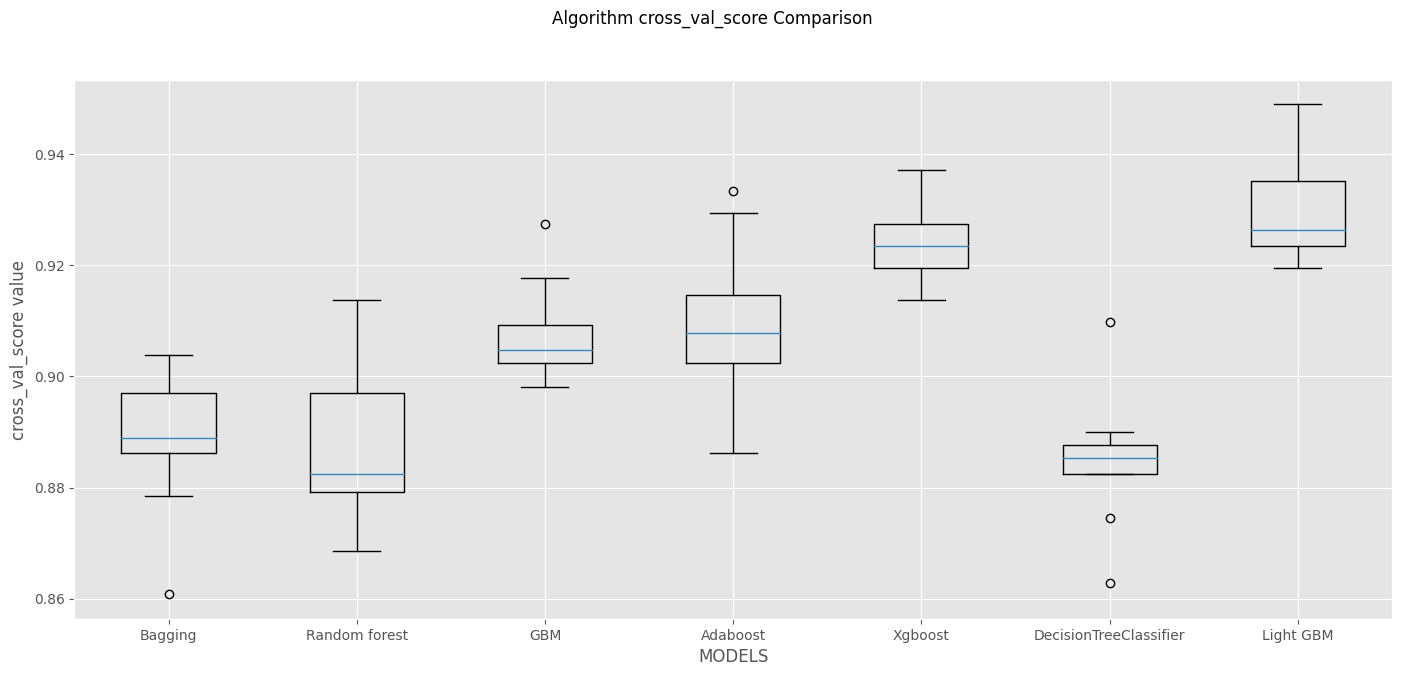

None


In [8]:
# %%file origin_model.py
# (Not downsampling yet)

## STEP 1: get metrics score: Accuracy, Recall, F1-score
def get_metrics_score(
    model, train, test, train_y, test_y, threshold=0.5, flag=False, roc=True
):
    
    # defining an empty list to store train and test results

    score_list = []

    pred_train = model.predict_proba(train)[:, 1] > threshold
    pred_test = model.predict_proba(test)[:, 1] > threshold

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)

    train_acc = accuracy_score(pred_train, train_y)
    test_acc = accuracy_score(pred_test, test_y)

    train_recall = recall_score(train_y, pred_train)
    test_recall = recall_score(test_y, pred_test)

    train_precision = precision_score(train_y, pred_train)
    test_precision = precision_score(test_y, pred_test)

    train_f1 = f1_score(train_y, pred_train)
    test_f1 = f1_score(test_y, pred_test)

    pred_train_proba = model.predict_proba(train)[:, 1]
    pred_test_proba = model.predict_proba(test)[:, 1]

    train_roc_auc = roc_auc_score(train_y, pred_train_proba)
    test_roc_auc = roc_auc_score(test_y, pred_test_proba)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
            train_f1,
            test_f1,
            train_roc_auc,
            test_roc_auc,
        )
    )

    if flag == True:

        print("Accuracy on training set : ", accuracy_score(pred_train, train_y))
        print("Accuracy on test set : ", accuracy_score(pred_test, test_y))
        print("Recall on training set : ", recall_score(train_y, pred_train))
        print("Recall on test set : ", recall_score(test_y, pred_test))
        print("Precision on training set : ", precision_score(train_y, pred_train))
        print("Precision on test set : ", precision_score(test_y, pred_test))
        print("F1 on training set : ", f1_score(train_y, pred_train))
        print("F1 on test set : ", f1_score(test_y, pred_test))

    if roc == True:
        if flag == True:
            print(
                "ROC-AUC Score on training set : ",
                roc_auc_score(train_y, pred_train_proba),
            )
            print(
                "ROC-AUC Score on test set : ", roc_auc_score(test_y, pred_test_proba)
            )

    return score_list  # returning the list with train and test scores


## get confusion matrix
def make_confusion_matrix(model, test_X, y_actual, labels=[1, 0]):
    
    y_predict = model.predict(test_X)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[1, 0])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - Attrited", "Actual - Existing"]],
        columns=[i for i in ["Predicted - Attrited", "Predicted - Existing"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(7, 3))
    sns.heatmap(df_cm, annot=labels, fmt="", cmap="Blues").set(title="Confusion Matrix")


## STEP 2: defining empty lists to add train and test results to add to each model

model_names = []
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []
roc_auc_train = []
roc_auc_test = []
cross_val_train = []


def add_score_model(model_name, score, cv_res):
    """Add scores to list so that we can compare all models score together"""
    model_names.append(model_name)
    acc_train.append(score[0])
    acc_test.append(score[1])
    recall_train.append(score[2])
    recall_test.append(score[3])
    precision_train.append(score[4])
    precision_test.append(score[5])
    f1_train.append(score[6])
    f1_test.append(score[7])
    roc_auc_train.append(score[8])
    roc_auc_test.append(score[9])
    cross_val_train.append(cv_res)


# Plotting boxplots for CV scores of all models defined above
def make_boxplot(cv_result, model_name): 
  fig = plt.figure(figsize=(17, 7))

  fig.suptitle("Algorithm cross_val_score Comparison")
  ax = fig.add_subplot(111)

  plt.boxplot(cv_results)
  ax.set_xticklabels(model_names)
  ax.set(
      xlabel='MODELS',
      ylabel='cross_val_score value',
  )
  return plt.show()


## STEP 3: model build and performance comparision: 
if __name__ == "__main__":
  models = []  # Empty list to store all the models
  cv_results = []

  # Appending models into the list
  models.append(("Bagging", BaggingClassifier(random_state=seed)))
  models.append(("Random forest", RandomForestClassifier(random_state=seed)))
  models.append(("GBM", GradientBoostingClassifier(random_state=seed)))
  models.append(("Adaboost", AdaBoostClassifier(random_state=seed)))
  models.append(("Xgboost", XGBClassifier(random_state=seed, eval_metric=loss_func)))
  models.append(("DecisionTreeClassifier", DecisionTreeClassifier(random_state=seed)))
  models.append(("Light GBM", lgb.LGBMClassifier(random_state=seed)))

  # For each model, run cross validation on 9 folds (+ 1 validation fold) with scoring for recall
  for name, model in models:
      scoring = "recall"
      kfold = StratifiedKFold(
          n_splits=10, shuffle=True, random_state=1
      )  # Setting number of splits equal to 10

      cv_result = cross_val_score(
          estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
      )
      cv_results.append(cv_result)

      model.fit(X_train, y_train)
      model_score = get_metrics_score(model, X_train, X_val, y_train, y_val)
      add_score_model(name, model_score, cv_result.mean())

  print("Operation Completed!")

  ## STEP 4: visualize all models result to compare performances
  # comparison frame
  comparison_frame = pd.DataFrame(
      {
          "Model": model_names,
          "Cross_Val_Score_Train": cross_val_train,
          "Train_Accuracy": acc_train,
          "Test_Accuracy": acc_test,
          "Train_Recall": recall_train,
          "Test_Recall": recall_test,
          "Train_Precision": precision_train,
          "Test_Precision": precision_test,
          "Train_F1": f1_train,
          "Test_F1": f1_test,
          "Train_ROC_AUC": roc_auc_train,
          "Test_ROC_AUC": roc_auc_test,
      }
  )

  # Sorting models in decreasing order of test recall
  print(comparison_frame.sort_values(
      by=["Cross_Val_Score_Train", "Test_Recall"], ascending=False
  ).style.highlight_max(color="green", axis=0).highlight_min(color="red", axis=0))

  # Also show boxplot on models performance: 
  print(make_boxplot(cv_result=cv_results, model_name=model_names))

In [8]:
## Print out comparison frame 

comparison_frame = pd.DataFrame(
    {
        "Model": model_names,
        "Cross_Val_Score_Train": cross_val_train,
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1": f1_train,
        "Test_F1": f1_test,
        "Train_ROC_AUC": roc_auc_train,
        "Test_ROC_AUC": roc_auc_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(
    by=["Cross_Val_Score_Train", "Test_Recall"], ascending=False
).style.highlight_max(color="green", axis=0).highlight_min(color="red", axis=0)

,Model,Cross_Val_Score_Train,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1,Train_ROC_AUC,Test_ROC_AUC
6,Light GBM,0.930169,0.997454,0.992846,0.974500,0.928824,0.985128,0.956970,0.979785,0.942687,0.999926,0.998113
4,Xgboost,0.923892,0.999578,0.992176,0.993723,0.922353,0.999605,0.952612,0.996656,0.937238,0.999997,0.997408
3,Adaboost,0.908985,0.990288,0.989717,0.911926,0.901765,0.933159,0.933618,0.922421,0.917415,0.998011,0.996924
2,GBM,0.907610,0.992312,0.990984,0.917222,0.903529,0.959573,0.951673,0.937920,0.926976,0.997993,0.997278
0,Bagging,0.888584,0.999044,0.989493,0.986858,0.882353,0.998016,0.948167,0.992406,0.914077,0.999990,0.983472
1,Random forest,0.887404,0.999988,0.990648,0.999804,0.884706,1.000000,0.964721,0.999902,0.922983,1.000000,0.994780
5,DecisionTreeClassifier,0.884662,1.000000,0.984128,1.000000,0.865294,1.000000,0.881894,1.000000,0.873515,1.000000,0.928729


This proccess will take **20-24min to run completely. 

The best model with respect to cross validation score and test recall is Light GBM.

The next best models to cross validation score and test recall are XGBoost, AdaBoost and GBM respectively

Extra step, **Plotting the cross-validation result comparison**


We are plotting the cross validation results for the 7 models in a Box plot, to check which models are potentially good. So we can see Light GBM and XGBoost give a consideration good performance. Adaboost with an outlier at the high end is also a good consideration. 

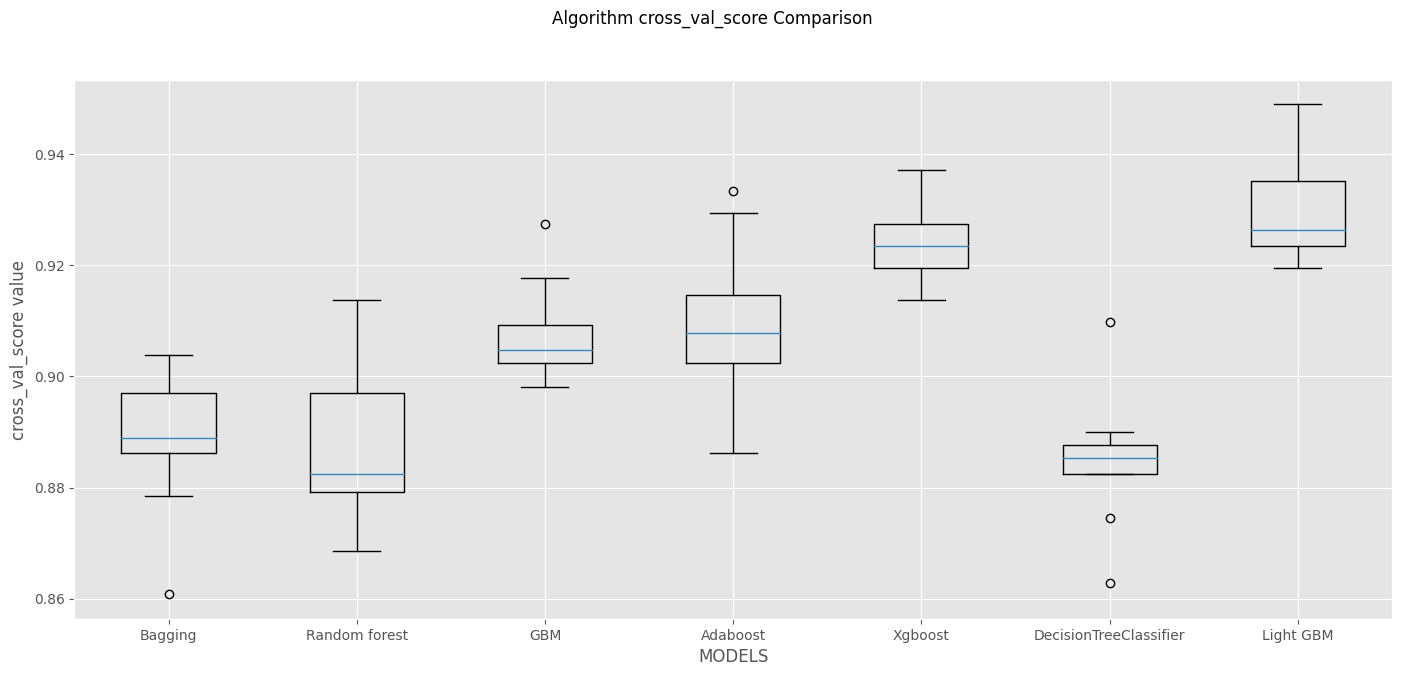

In [ ]:
# # Plotting boxplots for CV scores of all models defined above
# fig = plt.figure(figsize=(17, 7))

# fig.suptitle("Algorithm cross_val_score Comparison")
# ax = fig.add_subplot(111)

# plt.boxplot(cv_results)
# ax.set_xticklabels(model_names)
# ax.set(
#     xlabel='MODELS',
#     ylabel='cross_val_score value',
# )

# plt.show()

## Oversampling train data using SMOTE to deal with imbalance dataset.
Only when our dataset has a huge imbalance in target variable labels, to deal with such datasets, we have a few tricks up our sleeves, which we call Imbalanced Classification.

Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on the minority class, although typically it is performance on the minority class that is most important, which is the case in our study here.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [9]:
def oversampling_data():
  sm = SMOTE(
      sampling_strategy="minority", k_neighbors=10, random_state=seed
  )  # Synthetic Minority Over Sampling Technique
  return sm
  

In [ ]:
X_train_over, y_train_over = oversampling_data().fit_resample(X_train, y_train)
print("Before UpSampling, counts of label 'Yes-fraud': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No-nofraud': {} \n".format(sum(y_train == 0)))

print("After UpSampling, counts of label 'Yes-fraud': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No-nofraud': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))


Before UpSampling, counts of label 'Yes-fraud': 5098
Before UpSampling, counts of label 'No-nofraud': 75422 

After UpSampling, counts of label 'Yes-fraud': 75422
After UpSampling, counts of label 'No-nofraud': 75422 

After UpSampling, the shape of train_X: (150844, 14)
After UpSampling, the shape of train_y: (150844,) 



**Build Models with Oversampled Data**

We are building and training the same 7 models as before. We are however going to use the over-sampled training data for training the models.

In [11]:
# %%file oversample_model.py
# import model
# from model import comparison_frame, make_boxplot, add_score_model

def oversampling_data():
  sm = SMOTE(
      sampling_strategy="minority", k_neighbors=10, random_state=seed
  )  # Synthetic Minority Over Sampling Technique
  return sm

### STEP 3: model build and performance comparision with oversampling data: 

if __name__ == "__main__":
  X_train_over, y_train_over = oversampling_data().fit_resample(X_train, y_train)
  models_over = []

  # Appending models into the list

  models_over.append(("Bagging UpSampling", BaggingClassifier(random_state=seed)))
  models_over.append(
      ("Random forest UpSampling", RandomForestClassifier(random_state=seed))
  )
  models_over.append(("GBM UpSampling", GradientBoostingClassifier(random_state=seed)))
  models_over.append(("Adaboost UpSampling", AdaBoostClassifier(random_state=seed)))
  models_over.append(
      ("Xgboost UpSampling", XGBClassifier(random_state=seed, eval_metric=loss_func))
  )
  models_over.append(("dtree UpSampling", DecisionTreeClassifier(random_state=seed)))
  models_over.append(("Light GBM UpSampling", lgb.LGBMClassifier(random_state=seed)))

  for name, model in models_over:
      scoring = "recall"
      kfold = StratifiedKFold(
          n_splits=10, shuffle=True, random_state=1
      )  # Setting number of splits equal to 10

      cv_result_over = cross_val_score(
          estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
      )
      cv_results.append(cv_result_over)

      model.fit(X_train_over, y_train_over)
      model_score_over = get_metrics_score(
          model, X_train_over, X_val, y_train_over, y_val
      )
      add_score_model(name, model_score_over, cv_result_over.mean())

  print("Operation Completed!")

  # ## Comparing Models
  # comparison_frame = pd.DataFrame(
  #     {
  #         "Model": model_names,
  #         "Cross_Val_Score_Train": cross_val_train,
  #         "Train_Accuracy": acc_train,
  #         "Test_Accuracy": acc_test,
  #         "Train_Recall": recall_train,
  #         "Test_Recall": recall_test,
  #         "Train_Precision": precision_train,
  #         "Test_Precision": precision_test,
  #         "Train_F1": f1_train,
  #         "Test_F1": f1_test,
  #         "Train_ROC_AUC": roc_auc_train,
  #         "Test_ROC_AUC": roc_auc_test,
  #     }
  # )

  # # Sorting models in decreasing order of test recall
  # print(comparison_frame.sort_values(
  #     by=["Test_Recall", "Cross_Val_Score_Train"], ascending=False
  # ).style.highlight_max(color="green", axis=0).highlight_min(color="red", axis=0))


  # # Also show boxplot on models performance: 
  # print(make_boxplot(cv_result=cv_results, model_name=model_names))

Operation Completed!


In [13]:
## Comparing Models
comparison_frame = pd.DataFrame(
      {
          "Model": model_names,
          "Cross_Val_Score_Train": cross_val_train,
          "Train_Accuracy": acc_train,
          "Test_Accuracy": acc_test,
          "Train_Recall": recall_train,
          "Test_Recall": recall_test,
          "Train_Precision": precision_train,
          "Test_Precision": precision_test,
          "Train_F1": f1_train,
          "Test_F1": f1_test,
          "Train_ROC_AUC": roc_auc_train,
          "Test_ROC_AUC": roc_auc_test,
      }
  )

  # Sorting models in decreasing order of test recall
comparison_frame.sort_values(
      by=["Test_Recall", "Cross_Val_Score_Train"], ascending=False
  ).style.highlight_max(color="green", axis=0).highlight_min(color="red", axis=0)


,Model,Cross_Val_Score_Train,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1,Train_ROC_AUC,Test_ROC_AUC
9,GBM UpSampling,0.986264,0.986595,0.984016,0.986821,0.957059,0.986376,0.820474,0.986598,0.883519,0.999093,0.996889
10,Adaboost UpSampling,0.983082,0.982525,0.980440,0.983877,0.956471,0.981223,0.782860,0.982549,0.861001,0.998636,0.996008
13,Light GBM UpSampling,0.994126,0.995519,0.990350,0.995903,0.944706,0.995138,0.906832,0.995520,0.925382,0.999931,0.997373
11,Xgboost UpSampling,0.996288,0.999456,0.991990,0.999403,0.934706,0.999509,0.938571,0.999456,0.936634,0.999998,0.997488
8,Random forest UpSampling,0.995147,1.000000,0.988785,1.000000,0.933529,1.000000,0.894085,1.000000,0.913381,1.000000,0.996507
7,Bagging UpSampling,0.989791,0.999377,0.986252,0.999271,0.930588,0.999483,0.863066,0.999377,0.895556,0.999998,0.988653
6,Light GBM,0.930169,0.997454,0.992846,0.974500,0.928824,0.985128,0.956970,0.979785,0.942687,0.999926,0.998113
12,dtree UpSampling,0.985906,1.000000,0.979508,1.000000,0.924706,1.000000,0.788365,1.000000,0.851110,1.000000,0.953960
4,Xgboost,0.923892,0.999578,0.992176,0.993723,0.922353,0.999605,0.952612,0.996656,0.937238,0.999997,0.997408
2,GBM,0.907610,0.992312,0.990984,0.917222,0.903529,0.959573,0.951673,0.937920,0.926976,0.997993,0.997278


It takes 48-50 min to run! From here we can see Upsampling give much better performance. 

The best 4 models with respect to validation recall and cross validation score, are as follows:

- Light GBM trained with over/up-sampled data
- GBM trained with over/up-sampled data
- AdaBoost trained with over/up-sampled data
- XGBoost trained with over/up-sampled data

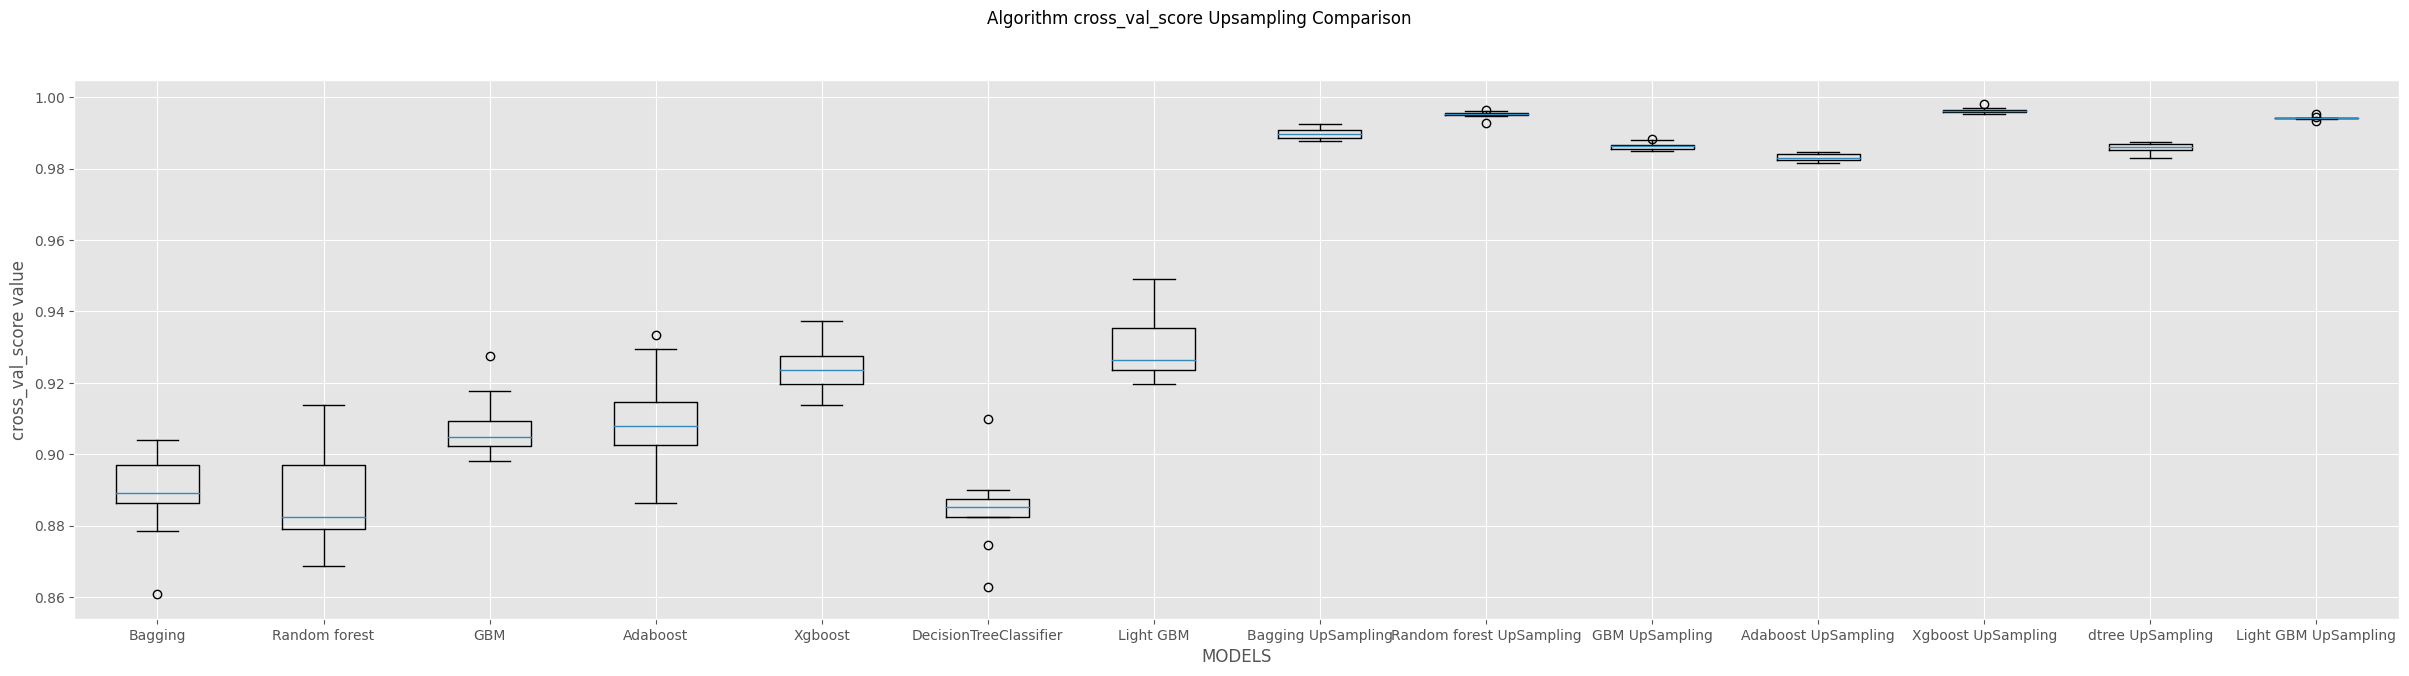

In [19]:
#   # Also show boxplot on models performance: 
# print(make_boxplot(cv_result=cv_results, model_name=model_names))

# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(30, 7))

fig.suptitle("Algorithm cross_val_score Upsampling Comparison")
ax = fig.add_subplot(111)

plt.boxplot(cv_results)
ax.set_xticklabels(model_names)
ax.set(
    xlabel='MODELS',
    ylabel='cross_val_score value',
)

plt.show()

## Downsampling train data using Random Under Sample


Downsampling is *another way * of dealing with imbalance in the dataset.

Random Downsampling involves randomly selecting examples from the majority class and deleting them from the training dataset until a balanced dataset is created.

In [6]:

def undersampling_data():
  rus = RandomUnderSampler(random_state=1)
  return rus


X_train_un, y_train_un = undersampling_data().fit_resample(X_train, y_train)

print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))


Before Under Sampling, counts of label 'Yes': 5098
Before Under Sampling, counts of label 'No': 75422 

After Under Sampling, counts of label 'Yes': 5098
After Under Sampling, counts of label 'No': 5098 

After Under Sampling, the shape of train_X: (10196, 14)
After Under Sampling, the shape of train_y: (10196,) 



In [20]:

# %%file undersample_model.py
# import model
# from model import comparison_frame, make_boxplot, add_score_model
def undersampling_data():
  rus = RandomUnderSampler(random_state=1)
  return rus

### STEP 3: model build and performance comparision with undersampling data: 

if __name__ == "__main__":
  X_train_un, y_train_un = undersampling_data().fit_resample(X_train, y_train)
  models_under = []

  # Appending models into the list

  models_under.append(("Bagging DownSampling", BaggingClassifier(random_state=seed)))
  models_under.append(
      ("Random forest DownSampling", RandomForestClassifier(random_state=seed))
  )
  models_under.append(("GBM DownSampling", GradientBoostingClassifier(random_state=seed)))
  models_under.append(("Adaboost DownSampling", AdaBoostClassifier(random_state=seed)))
  models_under.append(
      ("Xgboost DownSampling", XGBClassifier(random_state=seed, eval_metric=loss_func))
  )
  models_under.append(("dtree DownSampling", DecisionTreeClassifier(random_state=seed)))
  models_under.append(("Light GBM DownSampling", lgb.LGBMClassifier(random_state=seed)))

  for name, model in models_under:
      scoring = "recall"
      kfold = StratifiedKFold(
          n_splits=10, shuffle=True, random_state=1
      )  # Setting number of splits equal to 10

      cv_result_under = cross_val_score(
          estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
      )
      cv_results.append(cv_result_under)

      model.fit(X_train_un, y_train_un)
      model_score_under = get_metrics_score(model, X_train_un, X_val, y_train_un, y_val)
      add_score_model(name, model_score_under, cv_result_under.mean())

  print("Operation Completed!")

 

Operation Completed!


In [21]:
comparison_frame = pd.DataFrame(
    {
        "Model": model_names,
        "Cross_Val_Score_Train": cross_val_train,
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1": f1_train,
        "Test_F1": f1_test,
        "Train_ROC_AUC": roc_auc_train,
        "Test_ROC_AUC": roc_auc_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(
    by=["Test_Recall", "Cross_Val_Score_Train"], ascending=False
).style.highlight_max(color="blue", axis=0).highlight_min(color="violet", axis=0)


,Model,Cross_Val_Score_Train,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision,Train_F1,Test_F1,Train_ROC_AUC,Test_ROC_AUC
20,Light GBM DownSampling,0.981956,1.000000,0.980551,1.000000,0.976471,1.000000,0.774977,1.000000,0.864133,1.000000,0.997775
16,GBM DownSampling,0.979014,0.986465,0.978838,0.987054,0.975294,0.985893,0.759158,0.986473,0.853759,0.998830,0.997489
18,Xgboost DownSampling,0.981564,1.000000,0.980291,1.000000,0.974706,1.000000,0.773215,1.000000,0.862347,1.000000,0.997791
15,Random forest DownSampling,0.974306,1.000000,0.975671,1.000000,0.972941,1.000000,0.731535,1.000000,0.835143,1.000000,0.996386
17,Adaboost DownSampling,0.973522,0.979306,0.976118,0.979404,0.972353,0.979212,0.735648,0.979308,0.837598,0.998238,0.996428
14,Bagging DownSampling,0.967834,0.997940,0.975261,0.997842,0.963529,0.998038,0.731250,0.997940,0.831472,0.999978,0.989876
9,GBM UpSampling,0.986264,0.986595,0.984016,0.986821,0.957059,0.986376,0.820474,0.986598,0.883519,0.999093,0.996889
10,Adaboost UpSampling,0.983082,0.982525,0.980440,0.983877,0.956471,0.981223,0.782860,0.982549,0.861001,0.998636,0.996008
13,Light GBM UpSampling,0.994126,0.995519,0.990350,0.995903,0.944706,0.995138,0.906832,0.995520,0.925382,0.999931,0.997373
19,dtree DownSampling,0.954691,1.000000,0.956893,1.000000,0.943529,1.000000,0.601876,1.000000,0.734937,1.000000,0.950663


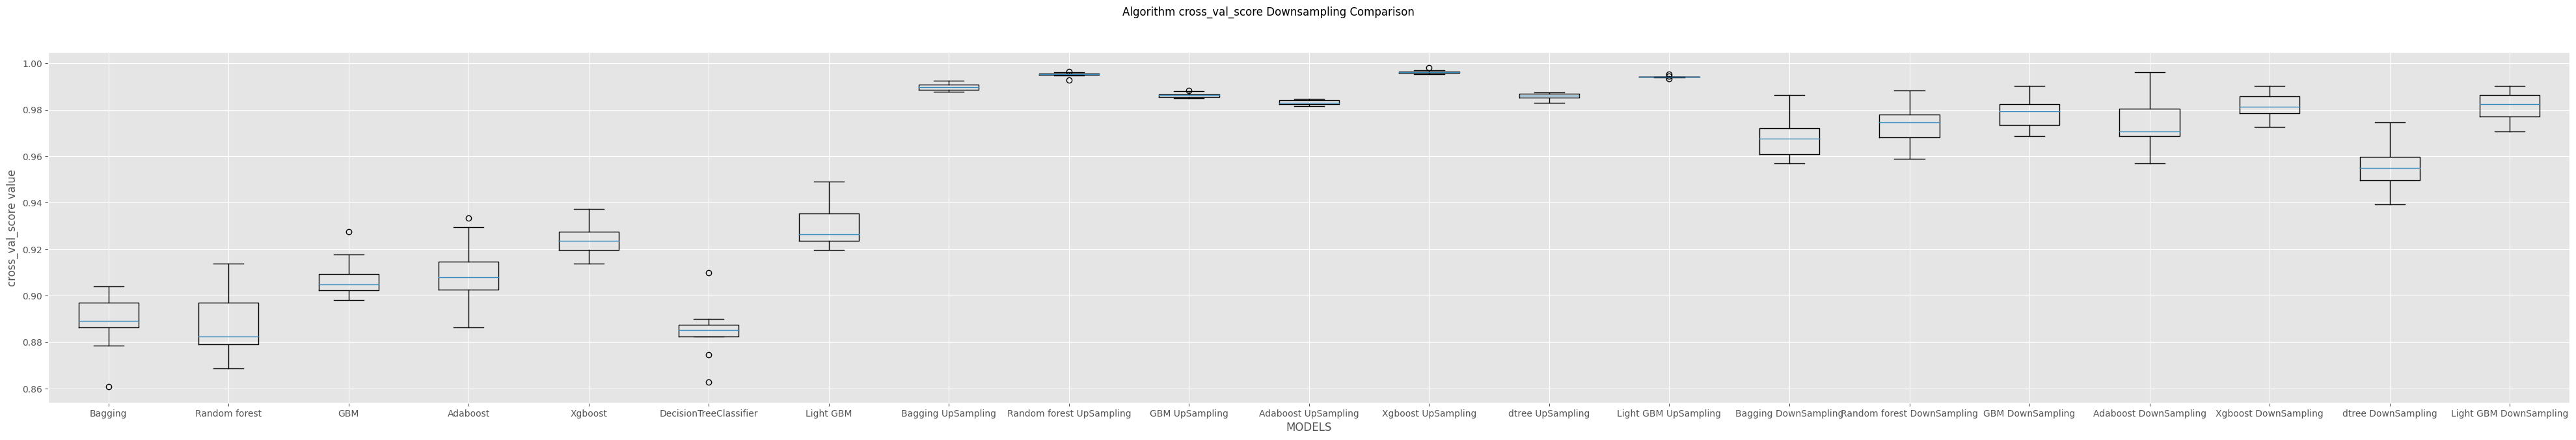

In [23]:
#   # Also show boxplot on models performance: 
# print(make_boxplot(cv_result=cv_results, model_name=model_names))

# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(50, 7))

fig.suptitle("Algorithm cross_val_score Downsampling Comparison")
ax = fig.add_subplot(111)

plt.boxplot(cv_results)
ax.set_xticklabels(model_names)
ax.set(
    xlabel='MODELS',
    ylabel='cross_val_score value',
)

plt.show()

The 4 best models are:
- XGBoost trained with downsampled data
- AdaBoost trained with downsampled data
- Light GBM trained with downsampled data
- GBM trained with downsampled data  
We will now try to tune these 4 models using Random Search CV on downsampled dataset. 

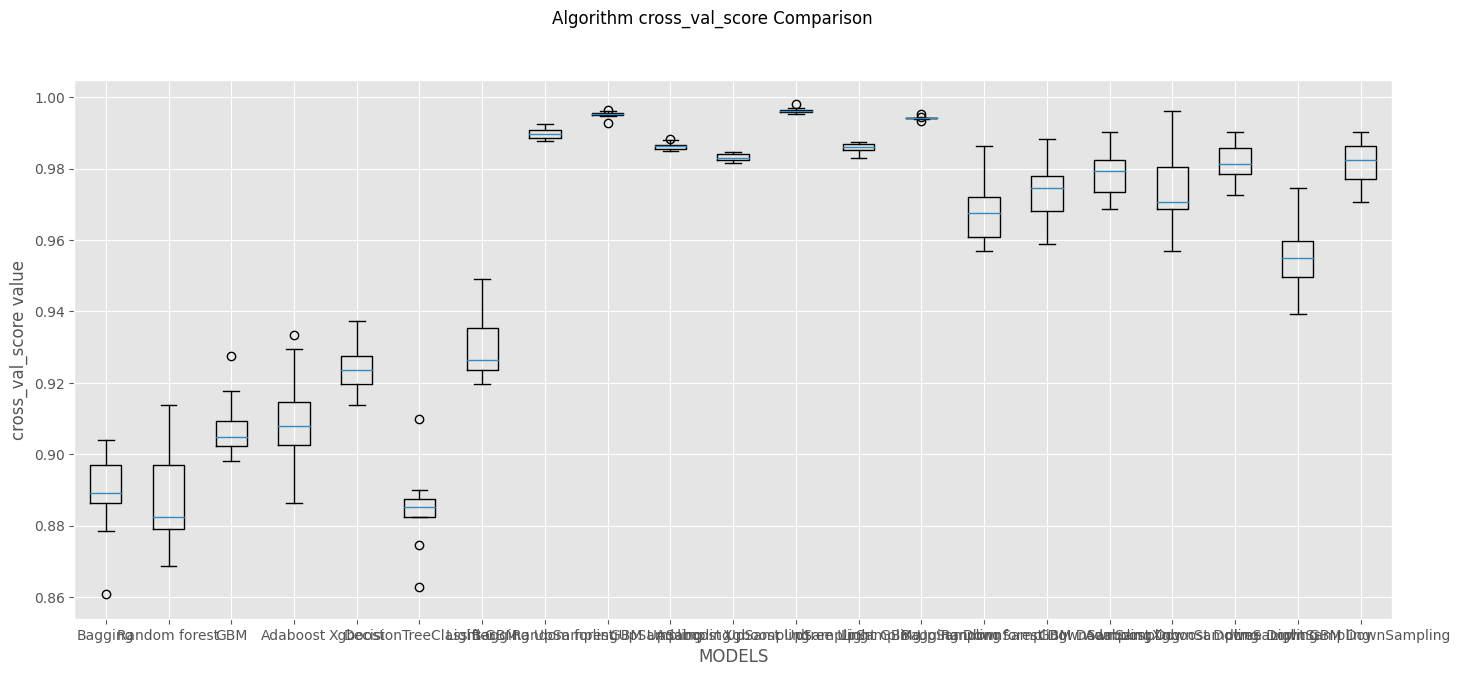

None


In [ ]:
  # Also show boxplot on models performance: 
# print(make_boxplot(cv_result=cv_results, model_name=model_names))

## Choice of models for tuning 

From performance grapth and boxplots on Regular model, Oversampling and Undersampling models, we have concluded: 

1. XGBoost Down-sampling has the best validation recall of 97%, along-with 98% cross validation score on train, and 0.99 AUC, which means is it has high possibility of performing very well in unseen dataset. There is a bit of over-fitting, which I expect to resolve by tuning.  
2. AdaBoost Downsampling is generalizing the model very well, it is neither over-fitting, nor has any bias, AUC is 0.995 and cross validation score on train is 97%, recall on validation set is same as XGBoost Downsampling (97.3%). I expect to improve the model (~98% on validation set) via tuning.  
3. Light GBM works really well in all aspects, but there is slight over-fitting problem, which I expect to resolve by tuning, with cross validation score on train 93%, recall on validation ~96%, AUC is 0.99. This looks like a very promising model.  
4. GBM is not overfitting, and neither it is suffering from bias or variance. Recall on validation is ~93%, accuracy on validation ~95%, AUC is ~0.99, cross validation score on train is ~95%. This would be my top choice because none of the training scores are 100%, meaning it is not trying to explain every single aspect of training data by overfitting it.

# Model Tuning using RandomizedSearchCV

## Tuning XGBOOST with Down Sampled data
Now we will find best parameter for high recall using Random Search with cross validation

In [24]:

# import model 
# from model import make_confusion_matrix

# defining XGBoost model
model = XGBClassifier(random_state=seed, eval_metric=loss_func)


# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,500,50),
            'scale_pos_weight':[2,5,10],
            'learning_rate':[0.01,0.1,0.2,0.05],
            'gamma':[0,1,3,5],
            'subsample':[0.8,0.9,1],
            'max_depth':np.arange(4,20,1),
            'reg_lambda':[5,10, 15, 20]} 

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
xgb_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=10, random_state=seed, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
xgb_tuned.fit(X_train_un,y_train_un)



RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learnin...
                                           predictor=None, random_state=1, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'gamma': [0, 1, 3, 5],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.05],
                                        'max_depth': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450]),
                                        'reg_lambda': [5, 10, 15, 20],
                                        'scale_pos_weight': [2, 5, 10],
                                        'subsample': [0.8, 0.9, 1]},
                   random_state=1, scoring=make_scorer(recall_score))

In [25]:
print("Best parameters are {} with CV score={}:" .format(xgb_tuned.best_params_,xgb_tuned.best_score_))

Best parameters are {'subsample': 1, 'scale_pos_weight': 10, 'reg_lambda': 5, 'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0} with CV score=0.9929384799106282:


None


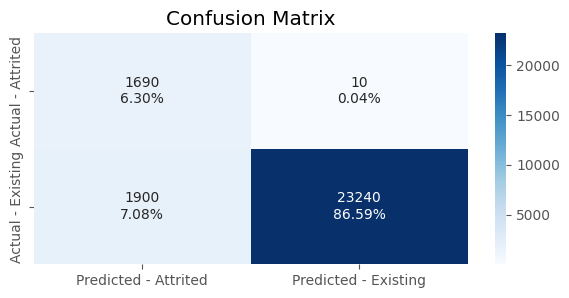

In [26]:
# building model with best parameters
xgb_tuned_model = XGBClassifier(
    n_estimators=50,
    scale_pos_weight=10,
    subsample=1,
    reg_lambda=5,
    max_depth=4,
    learning_rate=0.1,
    gamma=0,
    eval_metric=loss_func,
    random_state=seed,
)
# Fit the model on training data
xgb_tuned_model.fit(X_train_un, y_train_un)

# Get metric_scores

xgb_tuned_model_score = get_metrics_score(
    xgb_tuned_model, X_train, X_val, y_train, y_val
)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

scoring = "recall"
xgb_down_cv = cross_val_score(
    estimator=xgb_tuned_model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)


add_score_model(
    "XGB Tuned with Down Sampling", xgb_tuned_model_score, xgb_down_cv.mean()
)

# Get confusion_matirx 
print(make_confusion_matrix(xgb_tuned_model, X_val, y_val))

## Tuning AdaBoost with Down Sampled data

Finding best parameter for high recall using Random Search with cross validation

In [28]:
# import model 
# from model import make_confusion_matrix
# defining model
model = AdaBoostClassifier(random_state=seed)



# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators':np.arange(50,2000,50),
            'learning_rate':[0.01,0.1,0.2,0.05]} 

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
ada_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=10, random_state=seed, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
ada_tuned.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(ada_tuned.best_params_,ada_tuned.best_score_))




KeyboardInterrupt: ignored

None


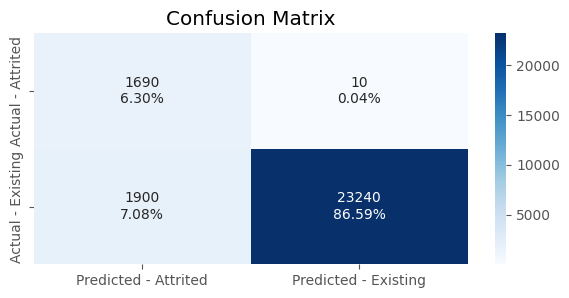

In [29]:
# building model with best parameters
ada_tuned_model = AdaBoostClassifier(
    n_estimators=1050, learning_rate=0.1, random_state=seed
)
# Fit the model on training data
ada_tuned_model.fit(X_train_un, y_train_un)

# Get metric scores
ada_tuned_model_score = get_metrics_score(
    ada_tuned_model, X_train, X_val, y_train, y_val
)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

scoring = "recall"
ada_down_cv = cross_val_score(
    estimator=ada_tuned_model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)


add_score_model(
    "AdaBoost Tuned with Down Sampling", ada_tuned_model_score, ada_down_cv.mean()
)

# Get confusion_matirx 
print(make_confusion_matrix(xgb_tuned_model, X_val, y_val))

## Tuning Light GBM with Down-Sampled data


Finding best parameter for high recall using Random Search with cross validation

In [30]:
# defining model
model = lgb.LGBMClassifier(random_state=seed)

# Hyper parameters
min_gain_to_split = [0.01, 0.1, 0.2, 0.3]
min_data_in_leaf = [10, 20, 30, 40, 50]
feature_fraction = [0.8, 0.9, 1.0]
max_depth = [5, 8, 15, 25, 30]
extra_trees = [True, False]
learning_rate = [0.01,0.1,0.2,0.05]

# Parameter grid to pass in RandomizedSearchCV
param_grid={'min_gain_to_split': min_gain_to_split,
               'min_data_in_leaf': min_data_in_leaf,
               'feature_fraction': feature_fraction,
               'max_depth': max_depth,
               'extra_trees': extra_trees,
               'learning_rate': learning_rate,
               'boosting_type': ['gbdt'],
               'objective': ['binary'],
               'is_unbalance': [True],
               'metric': ['binary_logloss'],} 

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
lgbm_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=10, random_state=seed, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
lgbm_tuned.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(lgbm_tuned.best_params_,lgbm_tuned.best_score_))

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_gain_to_split is set=0.3, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.3
Best parameters are {'objective': 'binary', 'min_gain_to_split': 0.3, 'min_data_in_leaf': 50, 'metric': 'binary_logloss', 'max_depth': 5, 'learning_rate': 0.2, 'is_unbalance': True, 'feature_fraction': 0.8, 'extra_trees': False, 'boosting_type': 'gbdt'} with CV score=0.9823452367194422:


[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_gain_to_split is set=0.3, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] min_gain_to_split is set=0.3, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.3
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Wa

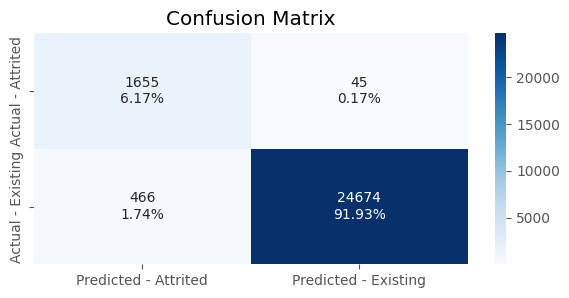

In [31]:
# building model with best parameters
lgbm_tuned_model = lgb.LGBMClassifier(
               min_gain_to_split = 0.3,
               min_data_in_leaf = 50,
               feature_fraction = 0.8,
               max_depth = 5,
               extra_trees = False,
               learning_rate = 0.2,
               objective = 'binary',
               metric = 'binary_logloss',
               is_unbalance = True,
               boosting_type = 'gbdt',
               random_state = seed, 
)
# Fit the model on training data
lgbm_tuned_model.fit(X_train_un, y_train_un)

# Get scores 
lgbm_tuned_model_score = get_metrics_score(
    lgbm_tuned_model, X_train, X_val, y_train, y_val
)

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

scoring = "recall"
lgb_down_cv = cross_val_score(
    estimator=lgbm_tuned_model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)


add_score_model(
    "Light GBM Tuned with Down Sampling", lgbm_tuned_model_score, lgb_down_cv.mean()
)

# Get cònfusion matrix 
make_confusion_matrix(lgbm_tuned_model, X_val, y_val)

## Tuning GBM with Down Sampled data

Finding best parameter for high recall using Random Search with cross validation

In [ ]:
# defining model
model = GradientBoostingClassifier(random_state=seed)

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10, 15] 


# Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf} 

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
gbm_tuned = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=10, random_state=seed, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
gbm_tuned.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(gbm_tuned.best_params_,gbm_tuned.best_score_))

In [ ]:
# building model with best parameters
gbm_tuned_model = GradientBoostingClassifier(
    n_estimators=700,
    max_features="auto",
    max_depth=25,
    min_samples_split=2,
    min_samples_leaf=15,
    random_state=seed,
)
# Fit the model on training data
gbm_tuned_model.fit(X_train_un, y_train_un)

# Get scores 
gbm_tuned_model_score = get_metrics_score(
    gbm_tuned_model, X_train, X_val, y_train, y_val
)


kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

scoring = "recall"
gbm_down_cv = cross_val_score(
    estimator=gbm_tuned_model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)


add_score_model(
    "GBM Tuned with Down Sampling", gbm_tuned_model_score, gbm_down_cv.mean()
)

# Get confusion matrix 
make_confusion_matrix(gbm_tuned_model, X_val, y_val)